# "Image-based Driver Drowsiness Classification using Neural Network"

## (Revisi) Tugas Besar IF5181 - Pengenalan Pola

23521027 - Kadek Denaya Rahadika

23521037 - Krisna Fathurahman

---

## Spesifikasi Soal

1. Gunakanlah dataset klasifikasi yang sudah dieksplorasi, berikanlah deskripsi dari minimal 3 model terbaik yang sudah ada dari studi literatur dalam 3 tahun terakhir untuk dataset tersebut.

2. Tuliskan desain eksperimen, dengan mencantumkan:
a. faktor apa yang diobservasi, variabel response yang digunakan, dan skenario eksperimen yang dilakukan. Teknik learning yang digunakan minimal menggunakan teknik yang dipelajari di kuliah (minimal DTL dan ANN).
b. skema eksperimen (terutama terkait data latih, validasi, dan tes) dan komposisi data sesuai skema tersebut.

3. Tuliskan hasil eksperimen dan analisisnya. Analisis dapat berupa perbandingan antar model, atau memberikan contoh error atau kasus penting yg perlu diobservasi, atau interpretasi hasil eksperimen berbasiskan statistik.

4. Pengumpulan tugas berupa notebook ipynb yang dilengkapi dengan rekap hasil eksperimen pada notebook tersebut.

5. Setiap kelompok akan mempresentasikan hasilnya pada Selasa 30 November 2021 dan Kamis 2 Desember, dan menyiapkan juga dalam bentuk video maksimum selama 10 menit (jika ada problem koneksi nantinya). Tuliskan link video pada bagian akhir notebook.

---

## I. Latar Belakang

Kelompok kami akan menggunakan dataset berupa gambar wajah manusia berlabel *drowsy* atau *not drowsy* pada pranala berikut ini yang didapatkan dari situs kaggle.com. 

Dataset ini berisikan 9120 gambar yang terbagi menjadi dua kelas seimbang, drowsy dan not drowsy.

    https://www.kaggle.com/rakibuleceruet/drowsiness-prediction-dataset

Target kelas dari permasalahan ini berupa single-class yang bernilai antara ***drowsy*** atau ***not drowsy***

-------------------------------

## I.2. Studi Literatur

1. Real-Time Driver Drowsiness Detection System Using Eye Aspect Ratio and Eye Closure Ratio

    Dalam penelitian yang dilakukan pada tahun 2019 ini, penulis (Mehta dkk.) menggunakan aspek rasio mata yang tertutup atau yang terbuka, yang diambil dari sensor setiap satu detik. Hasil sensor ini yang berupa facial landmarks lalu dimasukkan ke dalam model SVM, Naive Bayes, dan Random Forest. 

    ![Contoh facial landmark yang dijadikan input ke classifier](assets/facial_landmarks.jpeg)

    Gambar di atas adalah contoh facial landmark yang dijadikan input ke dalam classifier. Didapatkan bahwa random forest menghasilkan tingkat akurasi yang tertinggi. Kami akan mencoba menggunakan Random Forest dalam penelitian kami, namun kami akan menggunakan pixel sebagai input pengganti dari facial landmark, agar tidak menggunakan package bantuan lain.

    -------------------------------


2. Deep CNN Models-based Ensemble Approach to Driver Drowsiness Detection

    Penelitian ini dilakukan pada tahun 2020 oleh Dua dkk. Penelitian ini menggabungkan empat arsitektur CNN yang sudah sering digunakan dalam drowsiness detection, yaitu AlexNet, VGG-FaceNet, FlowImageNet, dan ResNet untuk mengklasifikasi input data berupa video. AlexNet digunakan untuk mengekstrak keadaan sekitar (environmental changes), VGG-FaceNet untuk mengesktrak karakteristik muka, FlowImageNet digunakan untuk mengekstrak gestur kepala, dan ResNet untuk mengestrak gestur tangan.

    ![](assets/vgg_facenet.jpeg)

    Gambar di atas adalah arsitektur dan rancangan eksperimen dari penelitian tersebut. 

    Karena input yang kami miliki hanyalah berupa gambar muka, sedangkan gestur kepala, tangan, dan perubahan daerah sekitar hanya dapat diambil dengan input video, kami akan mencoba menggunakan hanya VGG-FaceNet untuk mengklasifikasikan gambar input yang kami miliki. Berikut adalah arsitektur VGG-FaceNet yang digunakan oleh Dua dkk.

    ![](assets/vgg_facenet_architecture.JPG)


    -------------------------------

3. Driver Drowsiness Detection Based On the DenseNet201 Model

    Dalam penelitian di tahun 2021 ini, Hussein dkk. menggunakan CNN dengan arsitektur DenseNet untuk mengklasifikasikan gambar menjadi drowsy atau not drowsy. Namun, terdapat pra pemrosesan yaitu mendapati bagian wajah dan mata dengan menggunakan teknik Voila-Jones. 
    
    Hasil yang didapatkan sangat mengesankan, dengan akurasi mencapai 99%.

    Dalam percobaan kami, kami akan mencoba membangun arsitektur CNN dari awal, lalu mencoba menganalisis hasil dan melakukan proses penyesuaian arsitektur.





## I.3. Desain Eksperimen

Dalam eksperimen ini, kami akan mencoba mereplikasi (dengan sedikit modifikasi) beberapa model dari referensi literatur di atas. Lalu, kami juga akan mencoba membangun model CNN dari awal, lalu mencoba meningkatkan kinerja dari arsitektur CNN tersebut dengan melakukan modifikasi sesuai dengan hasil kinerja arsitektur yang sebelumnya.

Dalam mengevaluasi model, kami menggunakan validation set dibangun secara random dari training set yang ada.
Berikut merupakan komposisi data yang kami gunakan:

- Training set:
    - 4560 drowsy
    - 4560 not_drowsy
- Validation set:
    - 300 drowsy
    - 300 not_drowsy

Performance measure yang digunakan adalah akurasi, namun kami juga akan memperhatikan bagaimana kinerja precision dan recall dari model melalui confusion matrix.

Dalam percobaan CNN nanti, variabel yang akan kami observasi adalah:
- Besar epoch
- Penggunaan Dropout layer
- Besar matrix CNN
- Banyaknya dense layer

# II. Percobaan DTL

Dalam bagian ini, kami akan mencoba menggunakan decision tree based learning untuk melakukan pengklasifikasian terhadap dataset.
Model yang kami gunakan adalah Random Forest Classifier, yang menurut Mehta dkk dalam penelitian "Real-Time Driver Drowsiness Detection System Using Eye Aspect Ratio and Eye Closure Ratio" mendapati bahwa random forest classifier dapat secara baik mengklasifikasikan permasalahan drowsiness detection.

Pertama-tama, data yang merupakan gambar akan flattening menjadi nilai rgb per pixel nya. Data dibuat menjadi bentuk 100x100

Karena proses flattening lama, hasil flattening akan disimpan dalam dataset.csv agar dapat digunakan lagi nantinya, tanpa mengulangi proses flattening.

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMG_DIR = '/home/internet/itb/pattern_recognition/training_set'

for cls in os.listdir(IMG_DIR):
    cls_path = os.path.join(IMG_DIR, cls)
    print(cls_path)
    for i, img_file in enumerate(os.listdir(cls_path)):
        if i % 100 == 0:
            print(f"Processing image number: {i}")
        img = load_img(os.path.join(cls_path, img_file), target_size=(100, 100), color_mode="grayscale")
        img_array = (img_to_array(img)).flatten()
        
        img_array = np.append(img_array, 1 if cls == "drowsy" else 0)
        img_array  = img_array.reshape(-1, 1).T
        
        # save it to a csv file
        with open('dataset.csv', 'ab') as f:
            np.savetxt(f, img_array, fmt='%s', delimiter=",")

/home/internet/itb/pattern_recognition/training_set/drowsy
Processing image number: 0
Processing image number: 100
Processing image number: 200
Processing image number: 300
Processing image number: 400
Processing image number: 500
Processing image number: 600
Processing image number: 700
Processing image number: 800
Processing image number: 900
Processing image number: 1000
Processing image number: 1100
Processing image number: 1200
Processing image number: 1300
Processing image number: 1400
Processing image number: 1500
Processing image number: 1600
Processing image number: 1700
Processing image number: 1800
Processing image number: 1900
Processing image number: 2000
Processing image number: 2100
Processing image number: 2200
Processing image number: 2300
Processing image number: 2400
Processing image number: 2500
Processing image number: 2600
Processing image number: 2700
Processing image number: 2800
Processing image number: 2900
Processing image number: 3000
Processing image number

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMG_DIR = '/home/internet/itb/pattern_recognition/validation_set'

for cls in os.listdir(IMG_DIR):
    cls_path = os.path.join(IMG_DIR, cls)
    print(cls_path)
    for i, img_file in enumerate(os.listdir(cls_path)):
        if i % 100 == 0:
            print(f"Processing image number: {i}")
        img = load_img(os.path.join(cls_path, img_file), target_size=(100, 100), color_mode="grayscale")
        img_array = (img_to_array(img)).flatten()
        
        img_array = np.append(img_array, 1 if cls == "drowsy" else 0)
        img_array  = img_array.reshape(-1, 1).T
        
        # save it to a csv file
        with open('validation_dataset.csv', 'ab') as f:
            np.savetxt(f, img_array, fmt='%s', delimiter=",")

2021-12-04 08:02:01.735528: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-04 08:02:01.735605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/home/internet/itb/pattern_recognition/validation_set/not drowsy
Processing image number: 0
Processing image number: 100
Processing image number: 200
/home/internet/itb/pattern_recognition/validation_set/drowsy
Processing image number: 0
Processing image number: 100
Processing image number: 200


In [7]:
# using dask for big csv data instead of pandas
import dask.dataframe as dd

df = dd.read_csv("./dataset.csv", header=None)
val_df = dd.read_csv("./validation_dataset.csv", header=None)
df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,244.0,244.0,233.0,233.0,234.0,232.0,229.0,222.0,227.0,222.0,...,54.0,54.0,50.0,47.0,50.0,51.0,56.0,55.0,53.0,1.0


In [8]:
X_train=df.iloc[:, :-1]  # Features
y_train=df.iloc[:, -1].astype(int)  # Labels

X_test=val_df.iloc[:, :-1]  # Features
y_test=val_df.iloc[:, -1].astype(int)  # Labels

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9383333333333334


Ternyata, penggunaan Random Forest dalam proses pengklasifikasian ini cukup baik, degnan besaran performa akurasi sekitar 94% (berubah-ubah setiap run)

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[263,  37],
       [  0, 300]])

In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

263 37 0 300



Kita dapatkan True Negative (not drowsy) adalah 263, False Positive (terklasifikasi drowsy, seharusnya not drowsy) 37, 0 false negative, dan 300 (sempurna) true positive, dengan akurasi 93.8%.

In [13]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print(f"Precision: {precision} \n Recall: {recall}")

Precision: 0.8902077151335311 
 Recall: 1.0


# III. Percobaan Utama -- CNN

Dalam bagian ini, kami akan mencoba mengembangkan model CNN yang kami bangun untuk menyelesaikan masalah drowsiness detection

In [1]:
import tensorflow
from tensorflow.keras import layers, models
import pandas as pd

2021-12-04 08:49:40.403756: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-04 08:49:40.403781: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 9120 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


2021-12-03 12:53:45.274828: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-03 12:53:45.274870: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-03 12:53:45.274890: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-72CTI4N): /proc/driver/nvidia/version does not exist
2021-12-03 12:53:45.278201: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
285/285 [==============================] - 55s 188ms/step - loss: 0.7531 - accuracy: 0.7817 - val_loss: 0.4211 - val_accuracy: 0.8117
Epoch 2/10
285/285 [==============================] - 47s 161ms/step - loss: 0.3510 - accuracy: 0.8364 - val_loss: 0.3682 - val_accuracy: 0.8467
Epoch 3/10
285/285 [==============================] - 48s 167ms/step - loss: 0.3181 - accuracy: 0.8567 - val_loss: 0.3409 - val_accuracy: 0.8500
Epoch 4/10
285/285 [==============================] - 48s 166ms/step - loss: 0.2909 - accuracy: 0.8709 - val_loss: 0.3681 - val_accuracy: 0.8067
Epoch 5/10
285/285 [==============================] - 51s 178ms/step - loss: 0.2751 - accuracy: 0.8825 - val_loss: 0.3207 - val_accuracy: 0.8633
Epoch 6/10
285/285 [==============================] - 62s 216ms/step - loss: 0.2595 - accuracy: 0.8866 - val_loss: 0.3477 - val_accuracy: 0.8633
Epoch 7/10
285/285 [==============================] - 53s 185ms/step - loss: 0.2413 - accuracy: 0.8982 - val_loss: 0.3456 - val_ac

<AxesSubplot:>

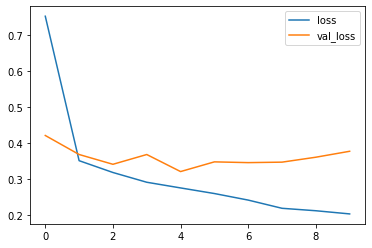

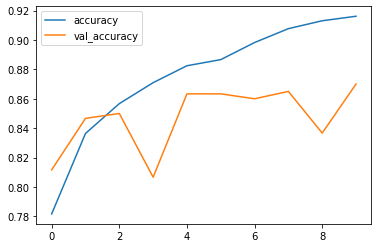

In [2]:
training_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/training_set",
    seed=101,
    image_size=(100, 100),
    batch_size=32
)
validation_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/validation_set",
    seed=101,
    image_size=(100, 100),
    batch_size=32
)


model = models.Sequential(
  [
    layers.Conv2D(8, (3, 3), activation="relu", padding="same", input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")
  ],
  name="Model"
)

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

history = model.fit(training_set,validation_data=validation_set, epochs=10)
metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot()
metrics_df[["accuracy","val_accuracy"]].plot()

Terlihat bahwa epoch 10 belum cukup untuk melihat hasil akhir akurasi dan val accuracy. Kita akan mencoba menambahkan epoch.



Found 9120 files belonging to 2 classes.


2021-12-04 08:49:58.103830: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-04 08:49:58.103871: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-04 08:49:58.103889: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-72CTI4N): /proc/driver/nvidia/version does not exist
2021-12-04 08:49:58.107168: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 600 files belonging to 2 classes.
Epoch 1/20
285/285 [==============================] - 42s 142ms/step - loss: 1.5094 - accuracy: 0.7922 - val_loss: 0.3977 - val_accuracy: 0.8350
Epoch 2/20
285/285 [==============================] - 40s 136ms/step - loss: 0.3453 - accuracy: 0.8439 - val_loss: 0.3533 - val_accuracy: 0.8417
Epoch 3/20
285/285 [==============================] - 39s 134ms/step - loss: 0.3132 - accuracy: 0.8593 - val_loss: 0.3373 - val_accuracy: 0.8433
Epoch 4/20
285/285 [==============================] - 38s 133ms/step - loss: 0.2920 - accuracy: 0.8701 - val_loss: 0.3823 - val_accuracy: 0.8167
Epoch 5/20
285/285 [==============================] - 39s 135ms/step - loss: 0.2856 - accuracy: 0.8760 - val_loss: 0.3321 - val_accuracy: 0.8433
Epoch 6/20
285/285 [==============================] - 39s 133ms/step - loss: 0.2753 - accuracy: 0.8821 - val_loss: 0.3267 - val_accuracy: 0.8583
Epoch 7/20
285/285 [==============================] - 39s 134ms/step - loss: 0.2555 - accu

<AxesSubplot:>

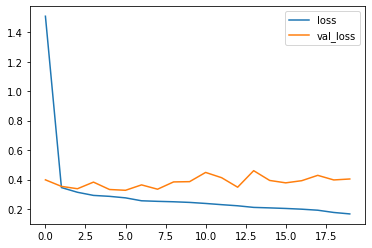

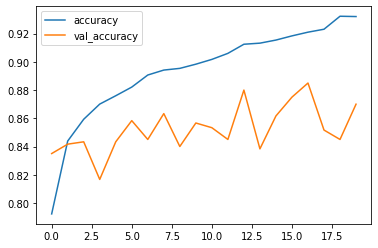

In [2]:
training_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/training_set",
    seed=101,
    image_size=(100, 100),
    batch_size=32
)
validation_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/validation_set",
    seed=101,
    image_size=(100, 100),
    batch_size=32
)

model = models.Sequential(
  [
    layers.Conv2D(8, (3, 3), activation="relu", padding="same", input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")
  ],
  name="Model"
)

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

history = model.fit(training_set,validation_data=validation_set, epochs=20)
metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot()
metrics_df[["accuracy","val_accuracy"]].plot()

Dari hasil ini kita dapat lihat bahwa terjadi fenomena overfitting terhadap validation set (ditunjukkan dari jauhnya perbedaan akurasi antara training set dan validation set).

### Pencegahan Overfitting

- Menambahkan Dropout Layer untuk mengurangi network complexity. 

        Kitsuchart dkk. mengutarakan dalam penelitian yang mereka lakukan bahwa penggunaan dropout efisien dalam menurunkan overfit dalam CNN dengan dataset yang kecil.
        
        (https://ieeexplore.ieee.org/abstract/document/7863293)



- Menggunakan early stopping callback

Found 9120 files belonging to 2 classes.
Found 600 files belonging to 2 classes.
Epoch 1/20
285/285 [==============================] - 43s 145ms/step - loss: 0.7486 - accuracy: 0.6264 - val_loss: 0.5408 - val_accuracy: 0.7217
Epoch 2/20
285/285 [==============================] - 44s 149ms/step - loss: 0.4815 - accuracy: 0.7576 - val_loss: 0.5098 - val_accuracy: 0.7567
Epoch 3/20
285/285 [==============================] - 40s 139ms/step - loss: 0.4230 - accuracy: 0.7860 - val_loss: 0.4154 - val_accuracy: 0.7933
Epoch 4/20
285/285 [==============================] - 41s 140ms/step - loss: 0.3793 - accuracy: 0.8123 - val_loss: 0.3987 - val_accuracy: 0.8150
Epoch 5/20
285/285 [==============================] - 41s 140ms/step - loss: 0.3613 - accuracy: 0.8208 - val_loss: 0.3505 - val_accuracy: 0.8267
Epoch 6/20
285/285 [==============================] - 41s 141ms/step - loss: 0.3556 - accuracy: 0.8254 - val_loss: 0.3624 - val_accuracy: 0.8117
Epoch 7/20
285/285 [=============================

<AxesSubplot:>

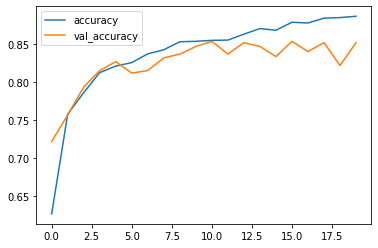

In [3]:
training_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/training_set",
    seed=101,
    image_size=(100, 100),
    batch_size=32
)
validation_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/validation_set",
    seed=101,
    image_size=(100, 100),
    batch_size=32
)

# add early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
  EarlyStopping(monitor='loss', patience=3),
]

model = models.Sequential(
  [
    layers.Conv2D(8, (3, 3), activation="relu", padding="same", input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    # add dropout layers
    layers.Dropout(0.1),

    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),

    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")
  ],
  name="Model"
)

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

history = model.fit(training_set,validation_data=validation_set, epochs=20, callbacks=callbacks)
metrics_df = pd.DataFrame(history.history)
metrics_df[["accuracy","val_accuracy"]].plot()

Terlihat bahwa overfit sudah bisa dikendalikan.

Perhatikan bahwa tren accuracy masih naik mengikuti besar epoch, berarti sebenarnya nilai accuracy dari training set dan validation set seharusnya bisa lebih baik lagi dengan menaikkan besarnya epoch.

Disini kami mencoba menambahkan besar matrix pada conv layer pertama (untuk penangkapan feature key lebih baik dalam Convolutional layer) dan penambahan layer pada step Fully Connected layernya.

Found 9120 files belonging to 2 classes.
Found 600 files belonging to 2 classes.
Epoch 1/20
285/285 [==============================] - 50s 169ms/step - loss: 0.8088 - accuracy: 0.6412 - val_loss: 0.6060 - val_accuracy: 0.6500
Epoch 2/20
285/285 [==============================] - 47s 161ms/step - loss: 0.4722 - accuracy: 0.7566 - val_loss: 0.5008 - val_accuracy: 0.7267
Epoch 3/20
285/285 [==============================] - 46s 159ms/step - loss: 0.4305 - accuracy: 0.7796 - val_loss: 0.4566 - val_accuracy: 0.7650
Epoch 4/20
285/285 [==============================] - 47s 161ms/step - loss: 0.3978 - accuracy: 0.8010 - val_loss: 0.3997 - val_accuracy: 0.8233
Epoch 5/20
285/285 [==============================] - 46s 159ms/step - loss: 0.3771 - accuracy: 0.8179 - val_loss: 0.3956 - val_accuracy: 0.7950
Epoch 6/20
285/285 [==============================] - 49s 169ms/step - loss: 0.3692 - accuracy: 0.8204 - val_loss: 0.3911 - val_accuracy: 0.7883
Epoch 7/20
285/285 [=============================

<AxesSubplot:>

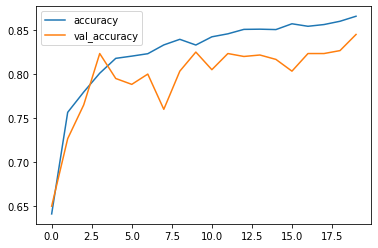

In [4]:
training_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/training_set",
    seed=101,
    image_size=(100, 100),
    batch_size=32
)
validation_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/validation_set",
    seed=101,
    image_size=(100, 100),
    batch_size=32
)

from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
  EarlyStopping(monitor='loss', patience=3),
]

model = models.Sequential(
  [
    layers.Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),

    layers.Dense(32, activation="relu"),
    layers.Dropout(0.25),

    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
  ],
  name="Model"
)

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

history = model.fit(training_set,validation_data=validation_set, epochs=20, callbacks=callbacks)
metrics_df = pd.DataFrame(history.history)
metrics_df[["accuracy","val_accuracy"]].plot()

Ternyata tidak menghasilkan akurasi yang lebih baik dari sebelumnya.

# IV Analisis

Dari tiga percobaan di atas, terlihat bahwa CNN belum mampu memberikan akurasi yang lebih baik dari dua metode lainnya.

Hal ini dikarenakan:
- Melihat grafik akurasi terhadap epoch, terlihat bahwa akurasi masih dapat meningkat seiring bertambahnya epoch. Epoch yang digunakan sangat kecil (hanya 10 dan 20 epoch, sementara fully connected model menggunakan 200 epoch). Kami tidak bisa mencoba menggunakan epoch yang besar karena keterbatasan resource. 
- Dataset yang digunakan sangat kecil. Dataset yang kami miliki tidak sampai sepuluh ribu data. Dan, di dalam dataset ini, sangat banyak data yang mirip (karena dataset dibangun dari video yang diclip frame nya).

-----------

Link Video:

https://drive.google.com/file/d/1ygTtCteJUjAWaPSyeCCYyoJJ-Ybvdywv/view?usp=sharing